# HMM for Stock Data
https://hmmlearn.readthedocs.io/en/0.2.0/auto_examples/plot_hmm_stock_analysis.html

## References
https://www.inf.ed.ac.uk/teaching/courses/asr/2016-17/asr03-hmmgmm-handout.pdf

In [2]:
!pip install yfinance;

In [3]:
import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import yfinance as yf

In [4]:
INTC = yf.Ticker("INTC")
INTC.get_shares_full()

2021-10-23 00:00:00-04:00    4067000064
2021-10-26 00:00:00-04:00    4067000064
2021-11-05 00:00:00-04:00    4073469952
2021-11-06 00:00:00-04:00    4067000064
2021-11-11 00:00:00-05:00    4102249984
2021-11-11 00:00:00-05:00    4067000064
2021-11-18 00:00:00-05:00    4097769984
2021-11-18 00:00:00-05:00    4067000064
2021-11-20 00:00:00-05:00    4067000064
2021-11-20 00:00:00-05:00    4080140032
2021-12-02 00:00:00-05:00    4117210112
2021-12-03 00:00:00-05:00    4067000064
2021-12-04 00:00:00-05:00    4087640064
2021-12-04 00:00:00-05:00    4067000064
2022-01-26 00:00:00-05:00    4141959936
2022-01-27 00:00:00-05:00    4067000064
2022-01-28 00:00:00-05:00    4072000000
2022-02-04 00:00:00-05:00    4175739904
2022-02-05 00:00:00-05:00    4072000000
2022-02-11 00:00:00-05:00    4072000000
2022-03-04 00:00:00-05:00    4151859968
2022-03-05 00:00:00-05:00    4072000000
2022-03-15 00:00:00-04:00    4203150080
2022-03-17 00:00:00-04:00    4164689920
2022-03-18 00:00:00-04:00    4072000000


In [5]:
hist = INTC.history(start="1995-01-01", end="2012-01-06")
hist.to_csv("stockprices.csv")

In [6]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,2.291885,2.305956,2.269371,2.296387,41721600,0.0,0.0
1995-01-04 00:00:00-05:00,2.305393,2.318901,2.278376,2.291885,41865600,0.0,0.0
1995-01-05 00:00:00-05:00,2.296388,2.341415,2.291885,2.309896,60480000,0.0,0.0
1995-01-06 00:00:00-05:00,2.309895,2.345917,2.305392,2.341414,56316800,0.0,0.0
1995-01-09 00:00:00-05:00,2.336910,2.377434,2.336910,2.377434,75056000,0.0,0.0
...,...,...,...,...,...,...,...
2011-12-29 00:00:00-05:00,17.248898,17.404675,17.192251,17.383432,22319300,0.0,0.0
2011-12-30 00:00:00-05:00,17.298470,17.433006,17.171015,17.171015,21710100,0.0,0.0
2012-01-03 00:00:00-05:00,17.433012,17.624194,17.270152,17.376366,44845600,0.0,0.0


<AxesSubplot: xlabel='Date'>

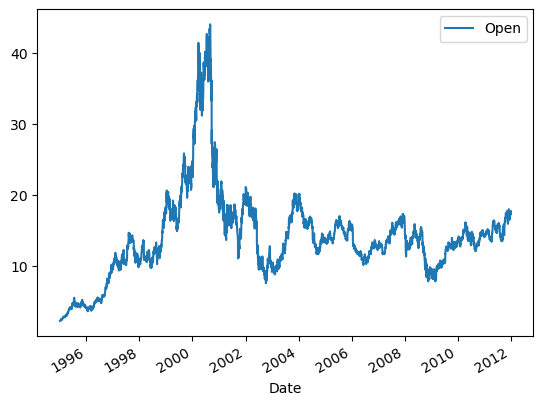

In [7]:
hist.reset_index().plot(x="Date", y="Open")

In [8]:
emissions = hist["Close"].to_numpy()

## Reshaping took a bit
This took me a bit to figure out

In [9]:
emissions = np.atleast_2d(emissions).T
emissions

array([[ 2.2963872 ],
       [ 2.2918849 ],
       [ 2.30989599],
       ...,
       [17.37636566],
       [17.77996635],
       [17.9853096 ]])

## Fit using Dynamax
https://probml.github.io/dynamax/api.html#dynamax.hidden_markov_model.DiagonalGaussianMixtureHMM

In [10]:
from dynamax.hidden_markov_model import DiagonalGaussianHMM

import jax.numpy as jnp
import jax.random as jr

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [11]:
true_num_states = 4
emission_dim = 1
hmm = DiagonalGaussianHMM(true_num_states, emission_dim)

In [12]:
key = jr.PRNGKey(0)
hmm = DiagonalGaussianHMM(4, emission_dim, transition_matrix_stickiness=10.)
params, props = hmm.initialize(key=key, method="kmeans", emissions=emissions)

/home/canyon/miniconda3/envs/ssm_book_club/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
params

ParamsDiagonalGaussianHMM(initial=ParamsStandardHMMInitialState(probs=Array([0.5464334 , 0.3061832 , 0.10259182, 0.04479165], dtype=float32)), transitions=ParamsStandardHMMTransitions(transition_matrix=Array([[0.823491  , 0.09372993, 0.05104779, 0.03173112],
       [0.01599798, 0.76646435, 0.1116748 , 0.1058628 ],
       [0.08503336, 0.09211437, 0.7288321 , 0.09402013],
       [0.15564974, 0.14060031, 0.02247819, 0.68127185]], dtype=float32)), emissions=ParamsDiagonalGaussianHMMEmissions(means=Array([[17.953318 ],
       [36.25472  ],
       [ 4.9940476],
       [12.42191  ]], dtype=float32), scale_diags=Array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)))

## Estimate Parmeters with Expectation Maximization

In [14]:
params, lps = hmm.fit_em(params, props, emissions, num_iters=100)

In [15]:
params

ParamsDiagonalGaussianHMM(initial=ParamsStandardHMMInitialState(probs=Array([0.0714286 , 0.07142863, 0.78571445, 0.0714286 ], dtype=float32)), transitions=ParamsStandardHMMTransitions(transition_matrix=Array([[9.9044704e-01, 2.0311305e-03, 6.5405293e-05, 7.4564330e-03],
       [7.8594340e-03, 9.9163419e-01, 2.5311176e-04, 2.5326805e-04],
       [1.7342449e-04, 1.7342655e-04, 9.9250776e-01, 7.1454481e-03],
       [6.7948452e-03, 5.4831184e-05, 1.7097428e-03, 9.9144053e-01]],      dtype=float32)), emissions=ParamsDiagonalGaussianHMMEmissions(means=Array([[16.277905],
       [28.906303],
       [ 5.284927],
       [11.966111]], dtype=float32), scale_diags=Array([[1.6014589],
       [7.411222 ],
       [1.873478 ],
       [1.3964951]], dtype=float32)))

In [16]:
most_likely_states = hmm.most_likely_states(params, emissions)
most_likely_states

Array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

## Plot of States

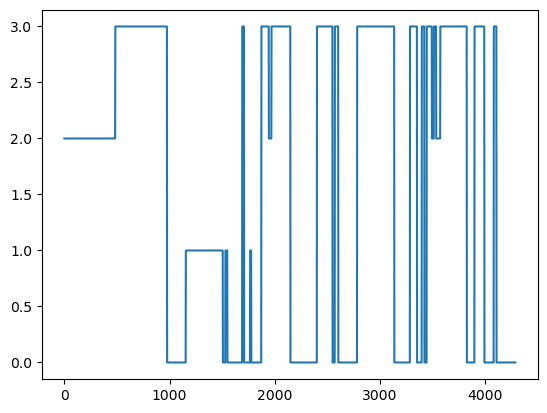

In [17]:
plt.plot(np.arange(most_likely_states.shape[0]), most_likely_states)

## Time Series with State Mask

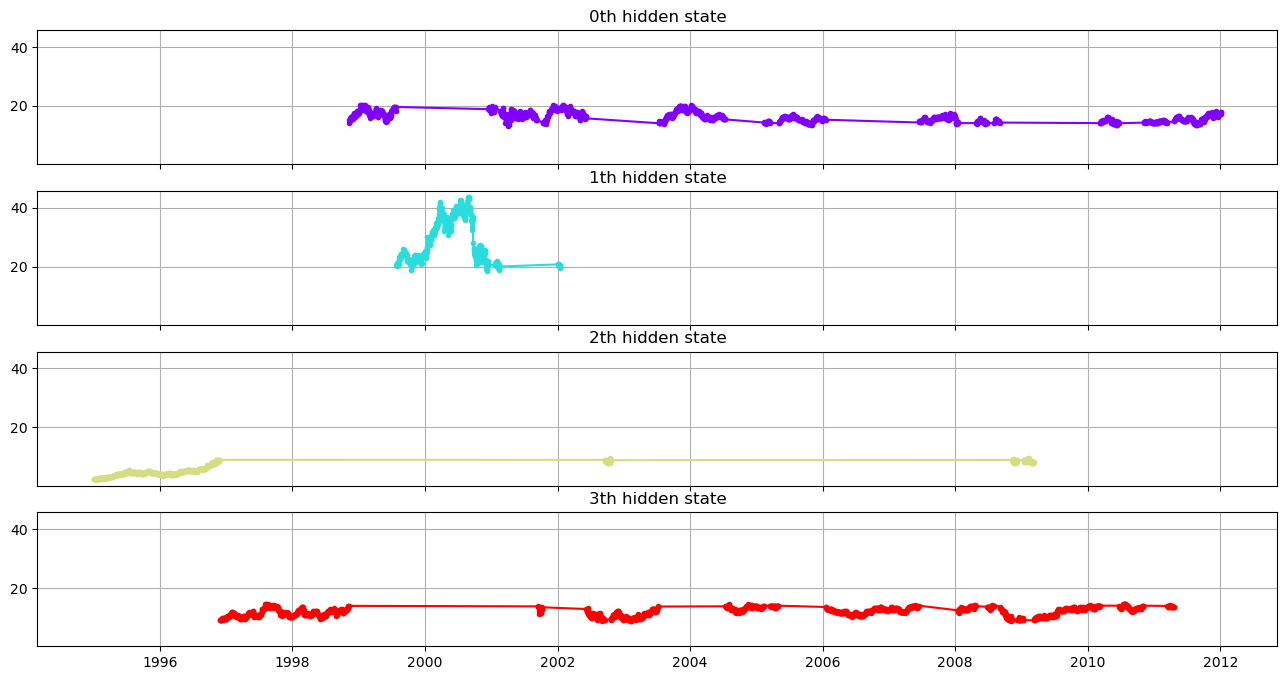

In [18]:
fig, axs = plt.subplots(4,1,sharex=True, sharey=True, figsize=(16,8))
colours = cm.rainbow(np.linspace(0, 1, 4))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = most_likely_states == i
    #ax.plot(hist.reset_index()["Date"].iloc[mask], hist["Close"].iloc[mask], ".-", c=colour)
    ax.plot(hist.index[mask], hist["Close"].to_numpy()[mask],  ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.

    ax.grid(True)